# Data Wrangling

# Imports

In [129]:
import pandas as pd
import requests
import math
from scipy import stats
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

# Objectives

- Data Collection
    - Goal: Organize your data to streamline the next steps of your capstone
        - Data loading
        - Data joining
        - Hint: Data Collection will require the use of the pandas library, and functions like read_csv(), depending on the type of data you want to read in!
        - Hint: when adding one dataset to another, make sure you use the right function: you might want to merge, join, or concatenate.
- Data Organization
    - Goal: Create a file structure and add your work to the GitHub repository you’ve created for this project.
        - File structure
        - GitHub
        - Hint: the glob library could come in handy here…
        - Remind yourself of why GitHub is useful. What are the main motivations for making a GitHub repository?
- Data Definition
    - Goal: Gain an understanding of your data features to inform the next steps of your project.
        - Column names
        - Data types
        - Description of the columns
        - Counts and percents unique values
        - Ranges of values
- Hint: here are some useful questions to ask yourself during this process:
    - Do your column names correspond to what those columns store?
    - Check the data types of your columns. Are they sensible?
    - Calculate summary statistics for each of your columns, such as mean, median, mode, standard deviation, range, and number of unique values. What does this tell you about your data? What do you now need to investigate?
- Data Cleaning
    - Goal: Clean up the data in order to prepare it for the next steps of your project.
        - NA or missing values
        - Duplicates
- Hint: don’t forget about the following awesome Python functions for data cleaning, which make life a whole lot easier:
    - loc[] - filter your data by label
    - iloc[] - filter your data by indexes
    - apply() - execute a function across an axis of a DataFrame
    - drop() - drop columns from a DataFrame
    - is_unique() - check if a column is a unique identifier
    - Series methods, such as str.contains(), which can be used to check if a certain substring occurs in a string of a Series, and str.extract(), which can be used to extract capture groups with a certain regex (or regular expression) pattern
    - numPy methods like .where(), to clean columns. Recall that such methods have the structure: np.where(condition, then, else)
    - DataFrame methods to check for null values, such as df.isnull().values.any()

# Data Collection

## Loading the data

In [130]:
stroke_data = pd.read_csv('stroke prediction/healthcare-dataset-stroke-data.csv')

# Data defintion and understanding the data

In [131]:
stroke_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [132]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [133]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [134]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Data Cleaning

## Number of missing values by column

In [135]:
missing = pd.concat([stroke_data.isnull().sum(), 100 * stroke_data.isnull().mean()], axis=1)
missing.columns=['count', 'percentages']
missing.sort_values(by=['count'])

,count,percentages
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
smoking_status,0,0.000000


## Filling missing BMI data with median BMI based on age

In [136]:
bmi_tables = pd.read_html('https://dqydj.com/bmi-distribution-by-age-calculator-for-the-united-states/')
len(bmi_tables)

4

In [137]:
child_bmi = bmi_tables[0]
adult_bmi = bmi_tables[1]
print(child_bmi)

           0                    1           2                    3  \
0  Age Range  25th Percentile BMI  Median BMI  75th Percentile BMI   
1        2-3                 15.6        16.3                 17.2   
2        4-5                 15.3        16.1                 17.3   
3        6-7                 15.0        16.1                 18.4   
4        8-9                 15.8        17.3                 19.8   
5      10-11                 16.8        19.2                 22.4   
6      12-13                 18.2        20.6                 25.1   
7      14-15                 19.4        22.0                 25.6   
8      16-17                 21.2        24.1                 27.8   

             4  
0  Average BMI  
1         16.5  
2         16.5  
3         17.2  
4         18.3  
5         20.2  
6         22.0  
7         23.4  
8         25.3  


In [138]:
child_bmi.columns = child_bmi.iloc[0]
child_bmi = child_bmi[1:]
adult_bmi.columns = adult_bmi.iloc[0]
adult_bmi = adult_bmi[1:]

In [139]:
child_bmi = child_bmi.set_index('Age Range')
adult_bmi = adult_bmi.set_index('Age Range')

In [140]:
child_bmi = child_bmi.drop(['25th Percentile BMI', '75th Percentile BMI', 'Average BMI'], axis=1)
adult_bmi = adult_bmi.drop(['25th Percentile BMI', '75th Percentile BMI', 'Average BMI'], axis=1)

In [141]:
median_bmi = child_bmi.append(adult_bmi)

In [142]:
print(median_bmi)

0         Median BMI
Age Range           
2-3             16.3
4-5             16.1
6-7             16.1
8-9             17.3
10-11           19.2
12-13           20.6
14-15           22.0
16-17           24.1
18-24           25.5
25-29           26.4
30-34           28.1
35-39           29.0
40-44           29.1
45-49           28.6
50-54           29.1
55-59           29.2
60-64           28.9
65-69           29.0
70-74           28.6
75+             27.5


In [143]:
def fill_bmi(arr):
    for index, row in arr.iterrows():
        if pd.isna(row['bmi']):
            if row['age'] <= 3:
                arr.iloc[index, 9] = median_bmi.iloc[0][0]
            elif row['age'] >= 4 and row['age'] <= 5:
                arr.iloc[index, 9] = median_bmi.iloc[1][0]
            elif row['age'] >= 6 and row['age'] <= 7:
                arr.iloc[index, 9] = median_bmi.iloc[2][0]
            elif row['age'] >= 8 and row['age'] <= 9:
                arr.iloc[index, 9] = median_bmi.iloc[3][0]
            elif row['age'] >= 10 and row['age'] <= 11:
                arr.iloc[index, 9] = median_bmi.iloc[4][0]
            elif row['age'] >= 12 and row['age'] <= 13:
                arr.iloc[index, 9] = median_bmi.iloc[5][0]
            elif row['age'] >= 14 and row['age'] <= 15:
                arr.iloc[index, 9] = median_bmi.iloc[6][0]
            elif row['age'] >= 16 and row['age'] <= 17:
                arr.iloc[index, 9] = median_bmi.iloc[7][0]
            elif row['age'] >= 18 and row['age'] <= 24:
                arr.iloc[index, 9] = median_bmi.iloc[8][0]
            elif row['age'] >= 25 and row['age'] <= 29:
                arr.iloc[index, 9] = median_bmi.iloc[9][0]
            elif row['age'] >= 30 and row['age'] <= 34:
                arr.iloc[index, 9] = median_bmi.iloc[10][0]
            elif row['age'] >= 35 and row['age'] <= 39:
                arr.iloc[index, 9] = median_bmi.iloc[11][0]
            elif row['age'] >= 40 and row['age'] <= 44:
                arr.iloc[index, 9] = median_bmi.iloc[12][0]
            elif row['age'] >= 45 and row['age'] <= 49:
                arr.iloc[index, 9] = median_bmi.iloc[13][0]
            elif row['age'] >= 50 and row['age'] <= 54:
                arr.iloc[index, 9] = median_bmi.iloc[14][0]
            elif row['age'] >= 55 and row['age'] <= 59:
                arr.iloc[index, 9] = median_bmi.iloc[15][0]
            elif row['age'] >= 60 and row['age'] <= 64:
                arr.iloc[index, 9] = median_bmi.iloc[16][0]
            elif row['age'] >= 65 and row['age'] <= 69:
                arr.iloc[index, 9] = median_bmi.iloc[17][0]
            elif row['age'] >= 70 and row['age'] <= 74:
                arr.iloc[index, 9] = median_bmi.iloc[18][0]
            elif row['age'] >= 75:
                arr.iloc[index, 9] = median_bmi.iloc[19][0]

In [144]:
fill_bmi(stroke_data)

In [145]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   object 
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 479.2+ KB


In [146]:
missing = pd.concat([stroke_data.isnull().sum(), 100 * stroke_data.isnull().mean()], axis=1)
missing.columns=['count', 'percentages']
missing.sort_values(by=['count'])

,count,percentages
id,0,0.0
gender,0,0.0
age,0,0.0
hypertension,0,0.0
heart_disease,0,0.0
ever_married,0,0.0
work_type,0,0.0
Residence_type,0,0.0
avg_glucose_level,0,0.0
bmi,0,0.0


### Let's set the index to the ID column

In [147]:
stroke_data = stroke_data.set_index('id')
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1


### find duplicates

In [148]:
duplicates = stroke_data[stroke_data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


### find extreme outliers

In [149]:
stroke_data.select_dtypes('number')

,age,hypertension,heart_disease,avg_glucose_level,stroke
id,,,,,
9046,67.0,0,1,228.69,1
51676,61.0,0,0,202.21,1
31112,80.0,0,1,105.92,1
60182,49.0,0,0,171.23,1
1665,79.0,1,0,174.12,1
...,...,...,...,...,...
18234,80.0,1,0,83.75,0
44873,81.0,0,0,125.20,0
19723,35.0,0,0,82.99,0


In [150]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   object 
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 479.1+ KB


### convert BMI to float

In [151]:
stroke_data['bmi'] = stroke_data['bmi'].astype(float)

In [152]:
z = np.abs(stats.zscore(stroke_data[['age', 'avg_glucose_level', 'bmi']]))
print(np.where(z > 3))

(array([  33,   45,  113,  122,  123,  135,  193,  196,  220,  243,  256,
        258,  270,  303,  330,  333,  358,  386,  430,  466,  544,  552,
        637,  662,  672,  715,  755,  761,  785,  805,  928, 1061, 1067,
       1070, 1077, 1113, 1207, 1304, 1322, 1384, 1436, 1453, 1529, 1532,
       1559, 1564, 1584, 1595, 1626, 1660, 1898, 2071, 2081, 2128, 2136,
       2182, 2203, 2293, 2330, 2441, 2462, 2494, 2545, 2555, 2567, 2633,
       2693, 2751, 2764, 2815, 2840, 3060, 3088, 3215, 3243, 3342, 3393,
       3508, 3588, 3606, 3688, 3702, 3825, 3909, 3931, 3980, 4048, 4154,
       4188, 4209, 4225, 4249, 4283, 4351, 4356, 4407, 4447, 4457, 4470,
       4475, 4598, 4711, 4838, 4906, 4909, 4952, 4983, 5034], dtype=int64), array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2

In [153]:
stroke_data[stroke_data['bmi'] > 70]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


In [154]:
stroke_data[stroke_data['avg_glucose_level'] > 300]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,


In [155]:
mean_bmi = stroke_data['bmi'].mean()
std_bmi = stroke_data['bmi'].std()
cut_off = std_bmi * 3
lower, upper = mean_bmi - cut_off, mean_bmi + cut_off

stroke_data[np.abs(stroke_data['bmi']) > upper]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
41069,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
1703,Female,52.0,0,0,Yes,Private,Urban,82.24,54.7,formerly smoked,0
66333,Male,52.0,0,0,Yes,Self-employed,Urban,78.40,64.8,never smoked,0
53144,Female,52.0,0,1,Yes,Private,Urban,72.79,54.7,never smoked,0
1307,Female,61.0,1,0,Yes,Private,Rural,170.05,60.2,smokes,0
545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
3130,Female,56.0,0,0,Yes,Private,Rural,112.43,54.6,never smoked,0


### We will leave in the outliers. BMI and glucose levels seem to have a lot of variability/spread in the general population.

## Categorical features

In [156]:
stroke_data.select_dtypes('object')

,gender,ever_married,work_type,Residence_type,smoking_status
id,,,,,
9046,Male,Yes,Private,Urban,formerly smoked
51676,Female,Yes,Self-employed,Rural,never smoked
31112,Male,Yes,Private,Rural,never smoked
60182,Female,Yes,Private,Urban,smokes
1665,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
18234,Female,Yes,Private,Urban,never smoked
44873,Female,Yes,Self-employed,Urban,never smoked
19723,Female,Yes,Self-employed,Rural,never smoked


### find unique categorical values

In [157]:
stroke_data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Since we have just one "other", we can safely drop this so that the gender column is clean. If there were multiple "others" that might perhaps represent transgender or non-gender conforming individuals, we might want to consider if this in its own right can help predict stroke.

In [158]:
stroke_data.drop(stroke_data[stroke_data['gender'] == 'Other'].index, inplace = True)

In [159]:
stroke_data['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [160]:
stroke_data['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [161]:
stroke_data['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [162]:
stroke_data['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [163]:
stroke_data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

# EDA

In [164]:
stroke_data.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276367,0.263777,0.238323,0.332060,0.245239
hypertension,0.276367,1.000000,0.108292,0.174540,0.159937,0.127891
heart_disease,0.263777,0.108292,1.000000,0.161907,0.038370,0.134905
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.167550,0.131991
bmi,0.332060,0.159937,0.038370,0.167550,1.000000,0.036040
stroke,0.245239,0.127891,0.134905,0.131991,0.036040,1.000000


<AxesSubplot:>

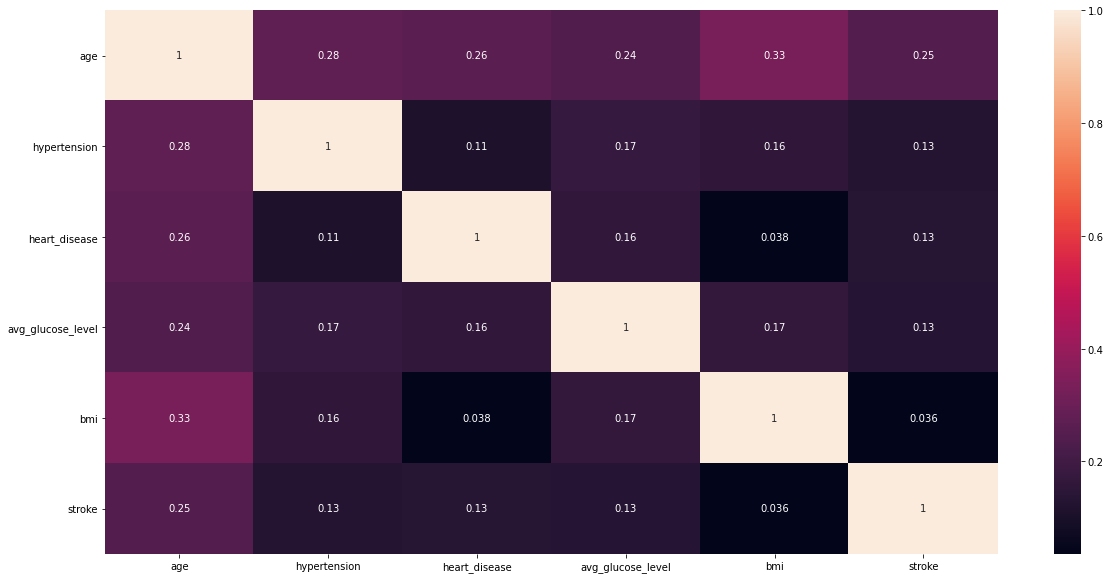

In [165]:
plt.figure(figsize=(20,10))
sns.heatmap(stroke_data.corr(), annot=True)

### let's check out some stroke vs non-stroke distributions

## ******add a plot showing the disparity in stroke vs non stroke, which might require us to use a special technique to account for. 

#### by age

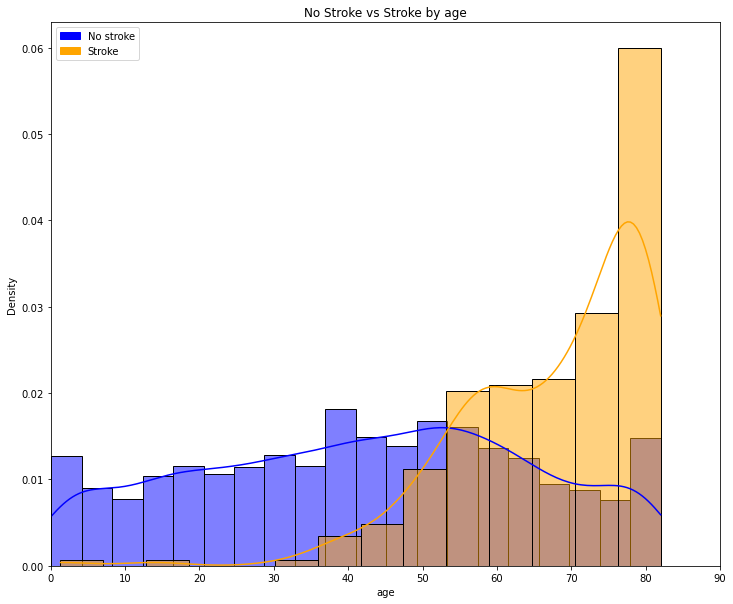

In [166]:
plt.figure(figsize=(12,10))

sns.histplot(stroke_data[stroke_data['stroke'] == 0]['age'], color='blue', stat='density', kde=True)
sns.histplot(stroke_data[stroke_data['stroke'] == 1]['age'], color='orange', stat='density', kde=True)

plt.title('No Stroke vs Stroke by age')
plt.xlim([0,90])
no_stroke_leg = mpatches.Patch(color='blue', label='No stroke')
stroke_leg = mpatches.Patch(color='orange', label='Stroke')
plt.legend(handles=[no_stroke_leg, stroke_leg])
plt.show()

<Figure size 864x720 with 0 Axes>

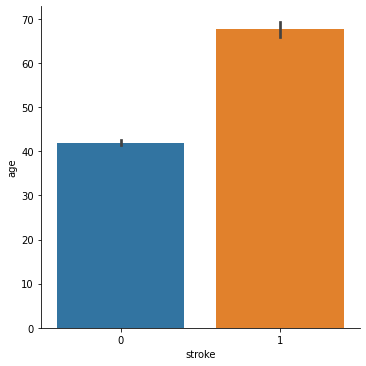

In [167]:
plt.figure(figsize=(12,10))

sns.catplot(x='stroke', y='age', data=stroke_data, kind='bar')

we can easily see these are different distributions, but age is already a well established risk factor for stroke. So we may want to consider this when building our model. 

#### by avg glucose level

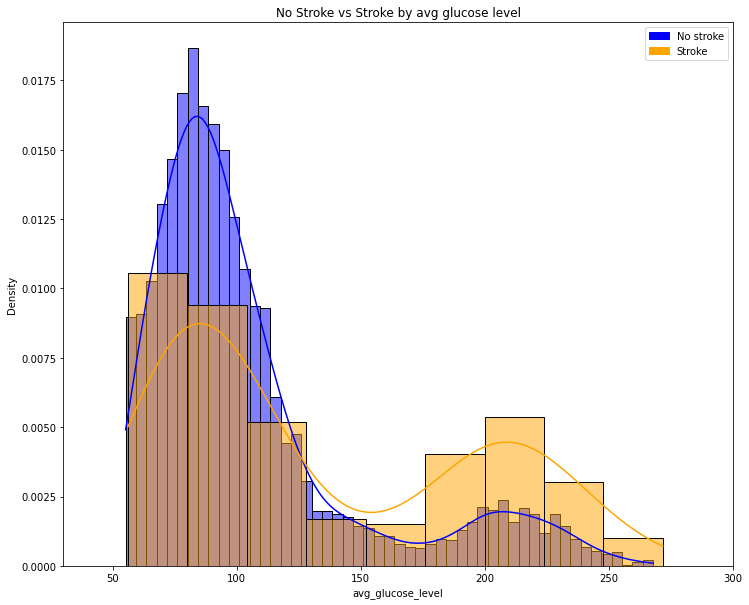

In [168]:
plt.figure(figsize=(12,10))

sns.histplot(stroke_data[stroke_data['stroke'] == 0]['avg_glucose_level'], color='blue', stat='density', kde=True)
sns.histplot(stroke_data[stroke_data['stroke'] == 1]['avg_glucose_level'], color='orange', stat='density', kde=True)

plt.title('No Stroke vs Stroke by avg glucose level')
plt.xlim([30,300])
no_stroke_leg = mpatches.Patch(color='blue', label='No stroke')
stroke_leg = mpatches.Patch(color='orange', label='Stroke')
plt.legend(handles=[no_stroke_leg, stroke_leg])
plt.show()

<Figure size 864x720 with 0 Axes>

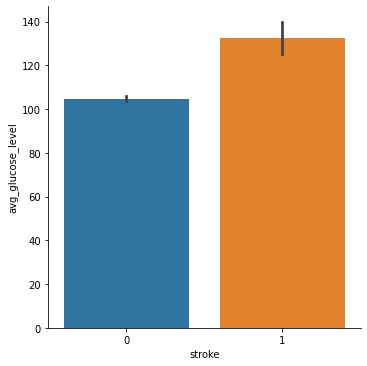

In [169]:
plt.figure(figsize=(12,10))

sns.catplot(x='stroke', y='avg_glucose_level', data=stroke_data, kind='bar')

#### by bmi

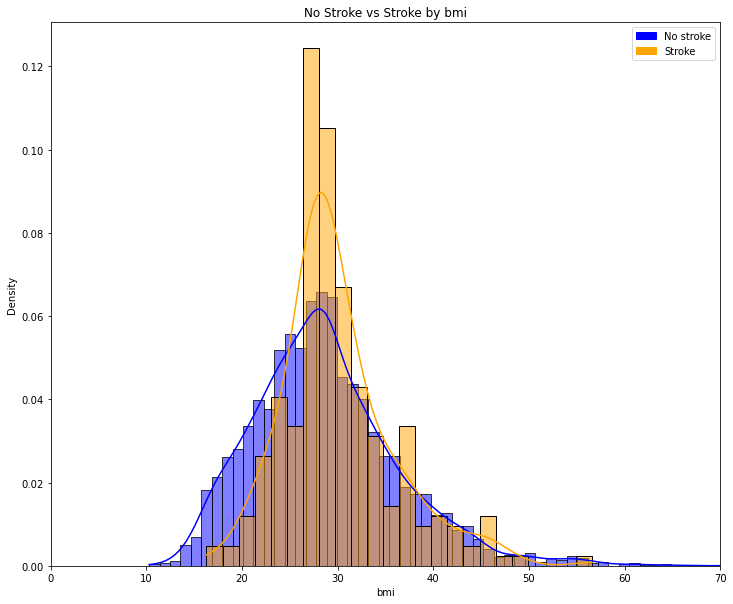

In [170]:
plt.figure(figsize=(12,10))

sns.histplot(stroke_data[stroke_data['stroke'] == 0]['bmi'], color='blue', stat='density', kde=True)
sns.histplot(stroke_data[stroke_data['stroke'] == 1]['bmi'], color='orange', stat='density', kde=True)

plt.title('No Stroke vs Stroke by bmi')
plt.xlim([0,70])
no_stroke_leg = mpatches.Patch(color='blue', label='No stroke')
stroke_leg = mpatches.Patch(color='orange', label='Stroke')
plt.legend(handles=[no_stroke_leg, stroke_leg])
plt.show()

<Figure size 864x720 with 0 Axes>

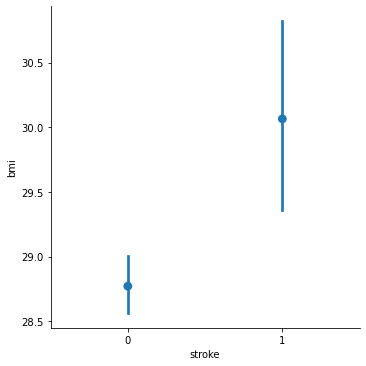

In [171]:
plt.figure(figsize=(12,10))

sns.catplot(x='stroke', y='bmi', data=stroke_data, kind='point', join=False)

### Visualizing the discrete variables 

## ***countplot might be a more clean way to plot the following plots

plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

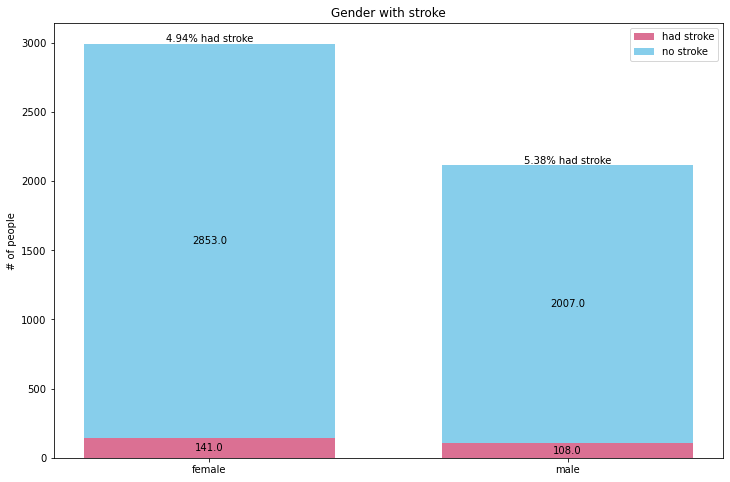

In [172]:
stroke = stroke_data[stroke_data['stroke'] == 1]['gender'].value_counts()
no_stroke = stroke_data[stroke_data['stroke'] == 0]['gender'].value_counts()

x = np.arange(2)
plt.figure(figsize=[12,8])
plt.xticks(x/2, ['female', 'male'])
plt.bar(x/2, stroke, width=0.35, label='had stroke', color='palevioletred')
plt.bar(x/2, no_stroke, width=0.35, label='no stroke', color='skyblue', bottom=stroke)

# add text annotation corresponding to the values of each bar.
for xpos, ypos, yval in zip(x/2, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x/2, stroke+no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x/2, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', ha="center", va="bottom")
    
plt.ylabel('# of people')
plt.title('Gender with stroke')
plt.legend()

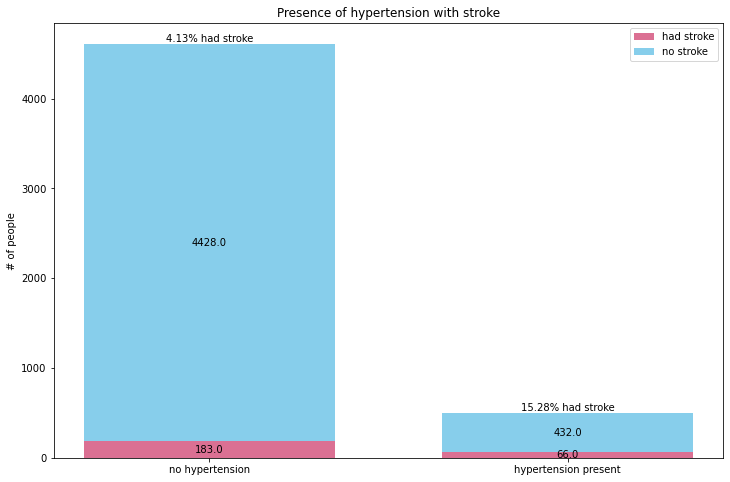

In [173]:
stroke = stroke_data[stroke_data['stroke'] == 1]['hypertension'].value_counts()
no_stroke = stroke_data[stroke_data['stroke'] == 0]['hypertension'].value_counts()

x = np.arange(2)
plt.figure(figsize=[12,8])
plt.xticks(x/2, ['no hypertension', 'hypertension present'])
plt.bar(x/2, stroke, width=0.35, label='had stroke', color='palevioletred')
plt.bar(x/2, no_stroke, width=0.35, label='no stroke', color='skyblue', bottom=stroke)

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x/2, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x/2, stroke+no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x/2, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', ha="center", va="bottom")
    
plt.ylabel('# of people')
plt.title('Presence of hypertension with stroke')
plt.legend()

A pretty sizable difference, but with low numbers it may not be significant.

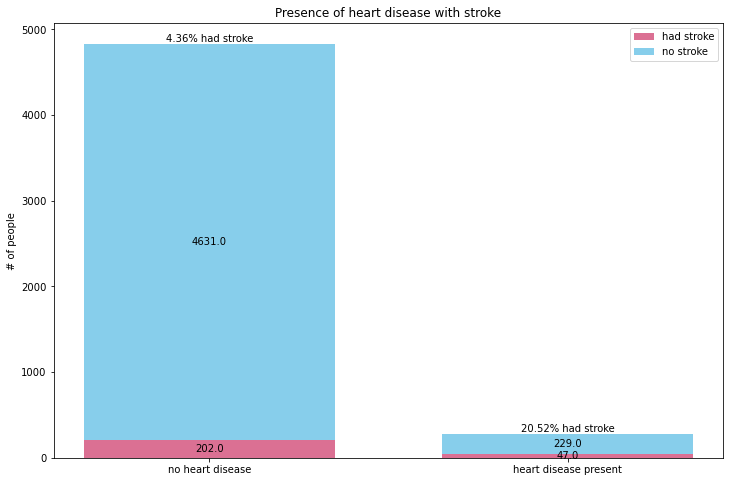

In [174]:
stroke = stroke_data[stroke_data['stroke'] == 1]['heart_disease'].value_counts()
no_stroke = stroke_data[stroke_data['stroke'] == 0]['heart_disease'].value_counts()

x = np.arange(2)
plt.figure(figsize=[12,8])
plt.xticks(x/2, ['no heart disease', 'heart disease present'])
plt.bar(x/2, stroke, width=0.35, label='had stroke', color='palevioletred')
plt.bar(x/2, no_stroke, width=0.35, label='no stroke', color='skyblue', bottom=stroke)

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x/2, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x/2, stroke+no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x/2, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', ha="center", va="bottom")
    
plt.ylabel('# of people')
plt.title('Presence of heart disease with stroke')
plt.legend()

A pretty sizable difference, but again low numbers may not reveal a significant difference.

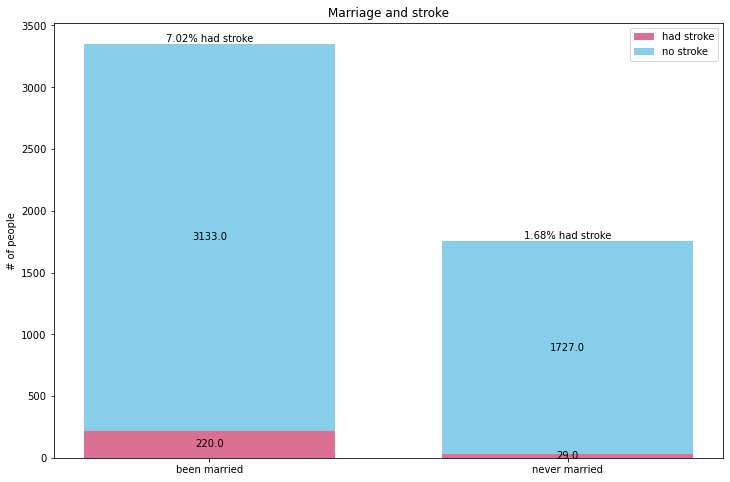

In [175]:
stroke = stroke_data[stroke_data['stroke'] == 1]['ever_married'].value_counts()
no_stroke = stroke_data[stroke_data['stroke'] == 0]['ever_married'].value_counts()

x = np.arange(2)
plt.figure(figsize=[12,8])
plt.xticks(x/2, ['been married', 'never married'])
plt.bar(x/2, stroke, width=0.35, label='had stroke', color='palevioletred')
plt.bar(x/2, no_stroke, width=0.35, label='no stroke', color='skyblue', bottom=stroke)

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x/2, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x/2, stroke+no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x/2, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', ha="center", va="bottom")
    
plt.ylabel('# of people')
plt.title('Marriage and stroke')
plt.legend()

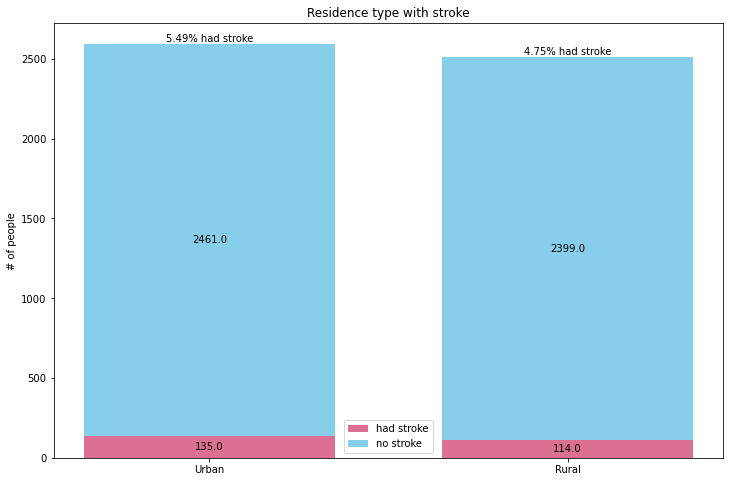

In [176]:
stroke = stroke_data[stroke_data['stroke'] == 1]['Residence_type'].value_counts()
no_stroke = stroke_data[stroke_data['stroke'] == 0]['Residence_type'].value_counts()

x = np.arange(2)
plt.figure(figsize=[12,8])
plt.xticks(x/2, ['Urban', 'Rural'])
plt.bar(x/2, stroke, width=0.35, label='had stroke', color='palevioletred')
plt.bar(x/2, no_stroke, width=0.35, label='no stroke', color='skyblue', bottom=stroke)

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x/2, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x/2, stroke+no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x/2, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', ha="center", va="bottom")
    
plt.ylabel('# of people')
plt.title('Residence type with stroke')
plt.legend()

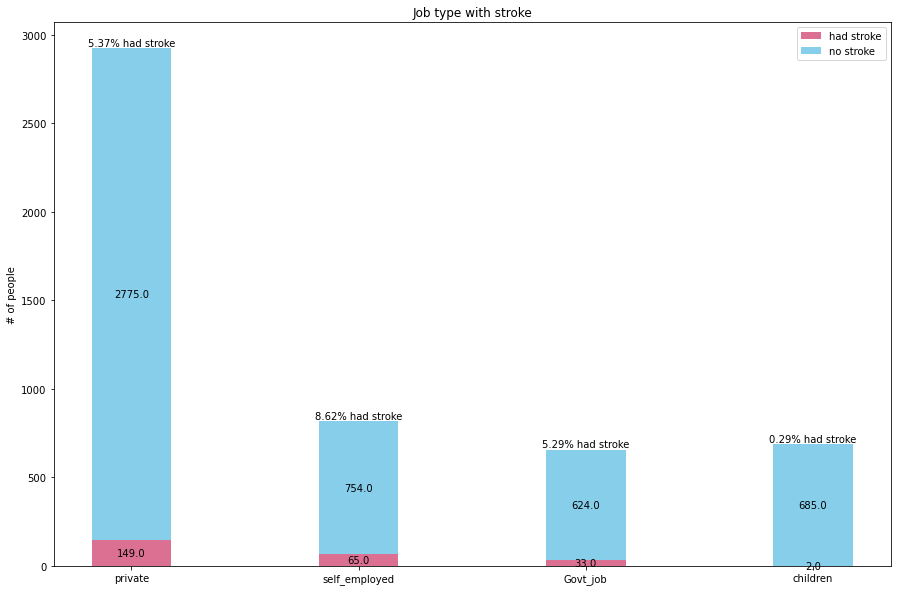

In [177]:
stroke = stroke_data[stroke_data['stroke'] == 1]['work_type'].value_counts()
no_stroke = stroke_data[(stroke_data['stroke'] == 0) & (stroke_data['work_type'] != 'Never_worked')]['work_type'].value_counts()
stroke = stroke[['Private', 'Self-employed', 'Govt_job', 'children']]
no_stroke = no_stroke[['Private', 'Self-employed', 'Govt_job', 'children']]

x = np.arange(4)
plt.figure(figsize=[15,10])
plt.xticks(x, ['private', 'self_employed', 'Govt_job', 'children'])
plt.bar(x, stroke, width=0.35, label='had stroke', color='palevioletred')
plt.bar(x, no_stroke, width=0.35, label='no stroke', color='skyblue', bottom=stroke)

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, stroke+no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', ha="center", va="bottom")
    
plt.ylabel('# of people')
plt.title('Job type with stroke')
plt.legend()

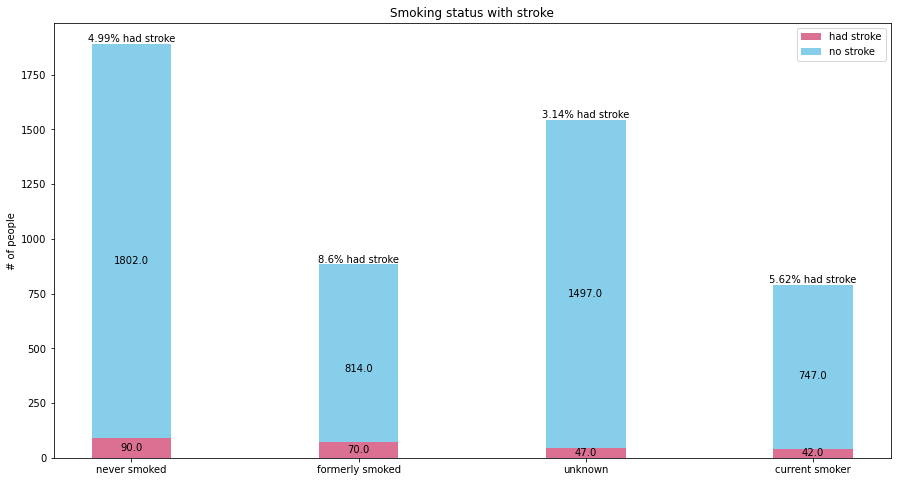

In [178]:
stroke = stroke_data[stroke_data['stroke'] == 1]['smoking_status'].value_counts()
no_stroke = stroke_data[stroke_data['stroke'] == 0]['smoking_status'].value_counts()
stroke = stroke[['never smoked', 'formerly smoked', 'Unknown','smokes']]
no_stroke = no_stroke[['never smoked', 'formerly smoked', 'Unknown','smokes']]

x = np.arange(4)
plt.figure(figsize=[15,8])
plt.xticks(x, ['never smoked', 'formerly smoked', 'unknown', 'current smoker'])
plt.bar(x, stroke, width=0.35, label='had stroke', color='palevioletred')
plt.bar(x, no_stroke, width=0.35, label='no stroke', color='skyblue', bottom=stroke)

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', ha="center", va="bottom")
    
plt.ylabel('# of people')
plt.title('Smoking status with stroke')
plt.legend()

interesting that former smokers had a higher percentage of strokes than current smokers. Probably due to low numbers.

### Convert categorical data

#### convert gender column to a binary column where 0 is male and 1 is female

In [179]:
conv_gen = pd.get_dummies(stroke_data['gender'])
conv_gen2 = pd.concat((conv_gen, stroke_data), axis=1)
conv_gen2 = conv_gen2.drop(['gender'], axis=1)
conv_gen2 = conv_gen2.drop(['Male'], axis=1)
stroke_bin_convert = conv_gen2.rename(columns={'Female': 'gender'})
print(stroke_bin_convert)

       gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
9046        0  67.0             0              1          Yes        Private   
51676       1  61.0             0              0          Yes  Self-employed   
31112       0  80.0             0              1          Yes        Private   
60182       1  49.0             0              0          Yes        Private   
1665        1  79.0             1              0          Yes  Self-employed   
...       ...   ...           ...            ...          ...            ...   
18234       1  80.0             1              0          Yes        Private   
44873       1  81.0             0              0          Yes  Self-employed   
19723       1  35.0             0              0          Yes  Self-employed   
37544       0  51.0             0              0          Yes        Private   
44679       1  44.0             0       

#### convert ever_married column to binary where Yes is 1 and No is 0

In [180]:
conv_mar = pd.get_dummies(stroke_bin_convert['ever_married'])
conv_mar2 = pd.concat((conv_mar, stroke_bin_convert), axis=1)
conv_mar2 = conv_mar2.drop(['ever_married'], axis=1)
conv_mar2 = conv_mar2.drop(['No'], axis=1)
stroke_bin_convert = conv_mar2.rename(columns={'Yes': 'ever_married'})

#### convert Residence_type to binary where urban is 1 and rural is 0

In [181]:
conv_res = pd.get_dummies(stroke_bin_convert['Residence_type'])
conv_res2 = pd.concat((conv_res, stroke_bin_convert), axis=1)
conv_res2 = conv_res2.drop(['Residence_type'], axis=1)
conv_res2 = conv_res2.drop(['Rural'], axis=1)
stroke_bin_convert = conv_res2.rename(columns={'Urban': 'Residence_type'})
stroke_bin_convert

,Residence_type,ever_married,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,1,1,0,67.0,0,1,Private,228.69,36.6,formerly smoked,1
51676,0,1,1,61.0,0,0,Self-employed,202.21,28.9,never smoked,1
31112,0,1,0,80.0,0,1,Private,105.92,32.5,never smoked,1
60182,1,1,1,49.0,0,0,Private,171.23,34.4,smokes,1
1665,0,1,1,79.0,1,0,Self-employed,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,1,1,1,80.0,1,0,Private,83.75,27.5,never smoked,0
44873,1,1,1,81.0,0,0,Self-employed,125.20,40.0,never smoked,0
19723,0,1,1,35.0,0,0,Self-employed,82.99,30.6,never smoked,0


In [182]:
stroke_bin_convert = stroke_bin_convert[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']]
stroke_bin_convert

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,0,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
51676,1,61.0,0,0,1,Self-employed,0,202.21,28.9,never smoked,1
31112,0,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
60182,1,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
1665,1,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,1,80.0,1,0,1,Private,1,83.75,27.5,never smoked,0
44873,1,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
19723,1,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0


### preparing to convert more categorical data and scale the data

In [183]:
#Create a new dataframe, `stroke_cat_convert` from `stroke_bin_convert`
stroke_cat_convert = stroke_bin_convert
#Save the index just in case
stroke_cat_index = stroke_cat_convert.index
#Save the column names (using the `columns` attribute) just in case
stroke_cat_columns = stroke_cat_convert.columns
stroke_cat_convert.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,0,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
51676,1,61.0,0,0,1,Self-employed,0,202.21,28.9,never smoked,1
31112,0,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
60182,1,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
1665,1,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


#### convert work_type and smoking_status categorical data into numeric values

In [184]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [185]:
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [5,9])], remainder= 'passthrough')
stroke_full_convert = np.array(ct.fit_transform(stroke_cat_convert))

In [186]:
stroke_cat_columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [187]:
added_cols = ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children', 'Uknown', 'formerly smoked', 'never smoked', 'smokes', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke']

In [188]:
stroke_df = pd.DataFrame(stroke_full_convert, columns = added_cols)

In [189]:
stroke_df

,Govt_job,Never_worked,Private,Self-employed,children,Uknown,formerly smoked,never smoked,smokes,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,67.0,0.0,1.0,1.0,1.0,228.69,36.6,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,61.0,0.0,0.0,1.0,0.0,202.21,28.9,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,80.0,0.0,1.0,1.0,0.0,105.92,32.5,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,49.0,0.0,0.0,1.0,1.0,171.23,34.4,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,79.0,1.0,0.0,1.0,0.0,174.12,24.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,80.0,1.0,0.0,1.0,1.0,83.75,27.5,0.0
5105,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,81.0,0.0,0.0,1.0,1.0,125.20,40.0,0.0
5106,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,35.0,0.0,0.0,1.0,0.0,82.99,30.6,0.0
5107,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,51.0,0.0,0.0,1.0,0.0,166.29,25.6,0.0


#### now for x the first 5 columns are work type and the following 4 are smoking status. Then it's gender, age, hypertension, heart_disease, ever_married, Residence_type, avg_glucose_level, bmi. 

## scale the data

In [190]:
#Save the column names (using the `columns` attribute) of `stroke_scale` into the variable 'stroke_columns'
stroke_df_cols = stroke_df.columns

In [191]:
from sklearn.preprocessing import StandardScaler

In [192]:
scaler = StandardScaler()
scaler.fit(stroke_df)
df_scaled = scaler.transform(stroke_df)
stroke_scaled_df = pd.DataFrame(df_scaled, columns=stroke_df_cols)

In [193]:
stroke_scaled_df.head()

,Govt_job,Never_worked,Private,Self-employed,children,Uknown,formerly smoked,never smoked,smokes,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,-0.384154,-0.065763,0.864444,-0.436931,-0.394157,-0.658103,2.186187,-0.766893,-0.427363,-1.189791,1.051242,-0.328637,4.184599,0.723678,0.983884,2.706450,1.004679,4.417926
1,-0.384154,-0.065763,-1.156812,2.288689,-0.394157,-0.658103,-0.457417,1.303962,-0.427363,0.840484,0.785889,-0.328637,-0.238972,0.723678,-1.016380,2.121652,0.008556,4.417926
2,-0.384154,-0.065763,0.864444,-0.436931,-0.394157,-0.658103,-0.457417,1.303962,-0.427363,-1.189791,1.626174,-0.328637,4.184599,0.723678,-1.016380,-0.004867,0.474276,4.417926
3,-0.384154,-0.065763,0.864444,-0.436931,-0.394157,-0.658103,-0.457417,-0.766893,2.339933,0.840484,0.255182,-0.328637,-0.238972,0.723678,0.983884,1.437473,0.720072,4.417926
4,-0.384154,-0.065763,-1.156812,2.288689,-0.394157,-0.658103,-0.457417,1.303962,-0.427363,0.840484,1.581949,3.042866,-0.238972,0.723678,-1.016380,1.501297,-0.625340,4.417926


## verify the scaling is correct with mean and std

In [194]:
stroke_scaled_df.mean()

Govt_job             3.093587e-16
Never_worked         3.362668e-16
Private              2.568094e-15
Self-employed       -4.159262e-17
children             2.293440e-15
Uknown               9.325526e-16
formerly smoked     -7.348138e-16
never smoked        -3.120533e-17
smokes               4.786193e-16
gender              -7.223295e-17
age                 -5.260507e-16
hypertension         5.667375e-16
heart_disease        1.071227e-15
ever_married        -1.840984e-15
Residence_type      -2.338879e-16
avg_glucose_level    3.269682e-15
bmi                 -3.854184e-15
stroke              -1.066828e-14
dtype: float64

In [195]:
stroke_scaled_df.std(ddof=0)

Govt_job             1.0
Never_worked         1.0
Private              1.0
Self-employed        1.0
children             1.0
Uknown               1.0
formerly smoked      1.0
never smoked         1.0
smokes               1.0
gender               1.0
age                  1.0
hypertension         1.0
heart_disease        1.0
ever_married         1.0
Residence_type       1.0
avg_glucose_level    1.0
bmi                  1.0
stroke               1.0
dtype: float64

## look into PCA transformation

## split the data into x and y

## lets ask if this is right to scale both x and y

In [196]:
x = stroke_scaled_df.iloc[:, :-1].values
y = stroke_scaled_df.iloc[:, -1].values

In [197]:
x

array([[-0.38415378, -0.06576283,  0.86444434, ...,  0.983884  ,
         2.70644995,  1.00467852],
       [-0.38415378, -0.06576283, -1.15681248, ..., -1.01637997,
         2.12165168,  0.00855607],
       [-0.38415378, -0.06576283,  0.86444434, ..., -1.01637997,
        -0.00486741,  0.47427566],
       ...,
       [-0.38415378, -0.06576283, -1.15681248, ..., -1.01637997,
        -0.51126562,  0.22847921],
       [-0.38415378, -0.06576283,  0.86444434, ..., -1.01637997,
         1.32837547, -0.41835355],
       [ 2.60312422, -0.06576283, -1.15681248, ...,  0.983884  ,
        -0.46069205, -0.34073362]])

In [198]:
y

array([ 4.41792624,  4.41792624,  4.41792624, ..., -0.22635054,
       -0.22635054, -0.22635054])

# Summary of EDA

In [199]:
stroke_scaled_df.corr(method='pearson')

,Govt_job,Never_worked,Private,Self-employed,children,Uknown,formerly smoked,never smoked,smokes,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
Govt_job,1.000000,-0.025263,-0.444394,-0.167849,-0.151417,-0.097473,0.029865,0.046854,0.029994,0.016598,0.129965,0.017661,0.001312,0.133964,0.013056,0.013908,0.079458,0.002660
Never_worked,-0.025263,1.000000,-0.076075,-0.028734,-0.025921,0.008796,-0.030081,0.036230,-0.028105,-0.011486,-0.078667,-0.021612,-0.015715,-0.090873,0.022848,-0.014665,-0.027976,-0.014885
Private,-0.444394,-0.076075,1.000000,-0.505448,-0.455965,-0.209926,0.025170,0.105003,0.100107,0.032502,0.116678,-0.005358,0.000068,0.154104,-0.018005,0.016451,0.207993,0.011927
Self-employed,-0.167849,-0.028734,-0.505448,1.000000,-0.172219,-0.106313,0.093492,0.030605,-0.003663,0.026045,0.327949,0.115417,0.086742,0.192637,0.010508,0.062770,0.072306,0.062150
children,-0.151417,-0.025921,-0.455965,-0.172219,1.000000,0.512721,-0.160577,-0.238118,-0.165273,-0.089226,-0.634320,-0.129535,-0.091654,-0.544658,-0.002388,-0.102195,-0.451989,-0.083888
Uknown,-0.097473,0.008796,-0.209926,-0.106313,0.512721,1.000000,-0.301028,-0.504695,-0.281249,-0.059557,-0.378366,-0.141551,-0.066765,-0.332335,-0.002167,-0.095035,-0.270214,-0.055924
formerly smoked,0.029865,-0.030081,0.025170,0.093492,-0.160577,-0.301028,1.000000,-0.350790,-0.195483,-0.043121,0.237347,0.059022,0.066938,0.171960,0.008093,0.067796,0.105488,0.064683
never smoked,0.046854,0.036230,0.105003,0.030605,-0.238118,-0.504695,-0.350790,1.000000,-0.327742,0.098952,0.119207,0.065018,-0.021893,0.102663,-0.024622,0.024011,0.109956,-0.004163
smokes,0.029994,-0.028105,0.100107,-0.003663,-0.165273,-0.281249,-0.195483,-0.327742,1.000000,-0.011408,0.073075,0.031213,0.044030,0.105132,0.027185,0.017716,0.086026,0.008920
gender,0.016598,-0.011486,0.032502,0.026045,-0.089226,-0.059557,-0.043121,0.098952,-0.011408,1.000000,0.027752,-0.021223,-0.085685,0.030171,0.006105,-0.054722,0.027258,-0.009081


<AxesSubplot:>

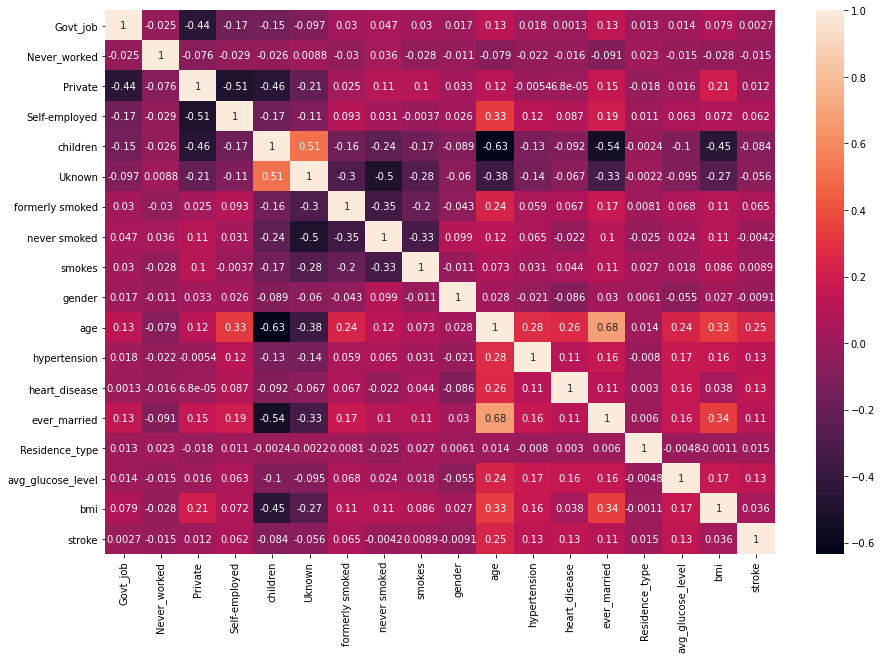

In [200]:
plt.figure(figsize=(15,10))
sns.heatmap(stroke_scaled_df.corr(method='pearson'), annot=True)

The findings from the EDA revealed that strongest correlation with stroke is age. This is not surprising, as age is a well known risk factor for stroke. We may want to see how models do with and without age included. Other strong correlations are with heart disease, hypertension and average glucose level. Surprisingly, bmi had a lower correlation than many others.